In [10]:
import itertools
import os
import collections
import pickle as pkl
import tqdm

import pandas as pd
import numpy as np

from plotnine import *

from collections import Counter

In [11]:
df=pd.read_csv("./Ext_Fig1b_results.csv", index_col=0)
df

,variable,value,var_cat,category
0,CT,27,CT,nodes
1,CT,26,CT,nodes
2,CT,24,CT,nodes
3,CT,25,CT,nodes
4,CT,26,CT,nodes
...,...,...,...,...
7149,CT-TG,2018,CT-TG,links
7150,CT-TG,1342,CT-TG,links
7151,CT-TG,2621,CT-TG,links
7152,CT-TG,1302,CT-TG,links


In [12]:
df = df.replace({"CT":"cell type", "CT-TG":"cell type-\nTG", 
                 "CT-CT":"cell type-\ncell type", "CT-TF":"cell type-\nTF"})

/home/sayali/.local/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 6 values. 7 were requested from it.
/home/sayali/.local/lib/python3.10/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 6 values. 7 were requested from it.
/home/sayali/.local/lib/python3.10/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


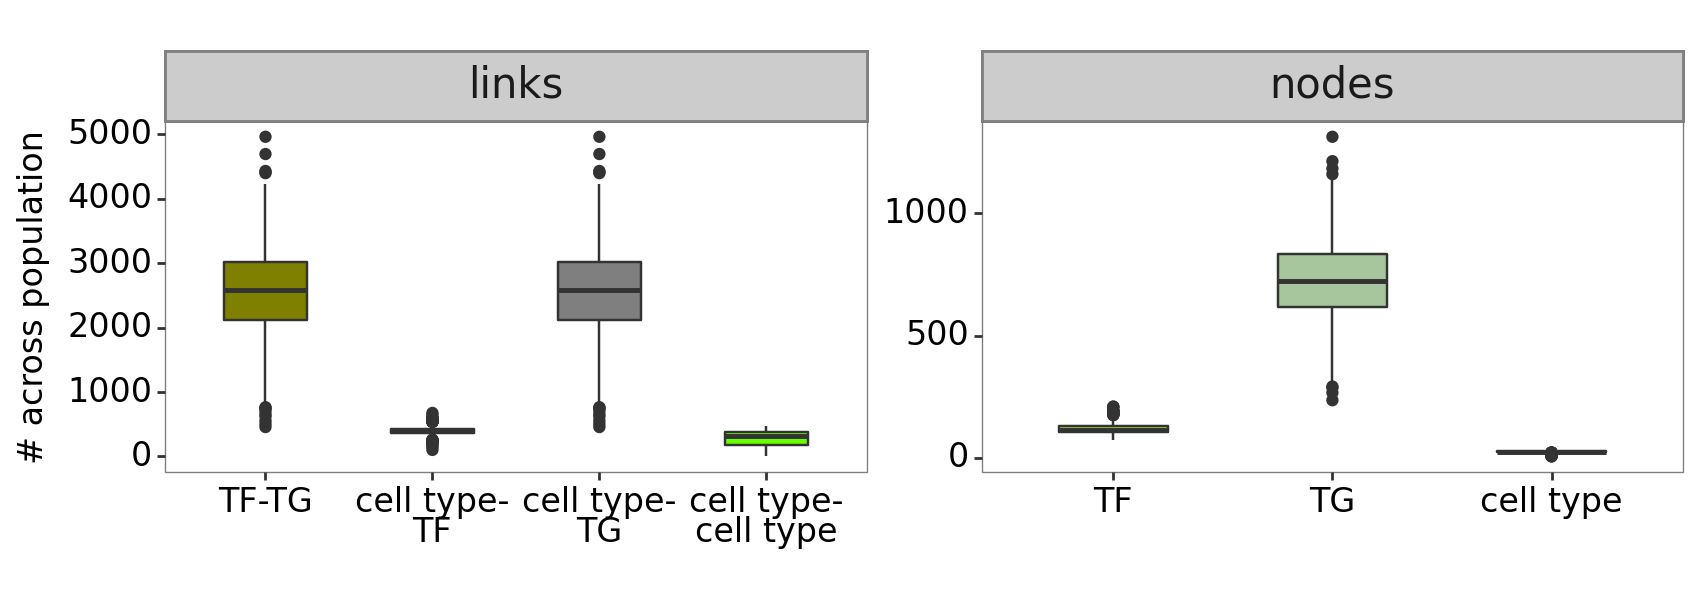

<Figure Size: (850 x 300)>

In [13]:
p = (
    ggplot(df, aes("var_cat","value"),)
    + geom_boxplot(aes(fill="var_cat",),  width=0.5,show_legend=False)
    + theme_bw()
    + theme(
        panel_grid_major=element_blank(),
        
        panel_grid_minor=element_blank(),
        panel_border=element_rect(colour = "grey", fill=None, size=0.5),
        panel_background=element_blank(),
        text=element_text(size=15),
        axis_text_x=element_text(colour="black", size=12, angle = 0,),
        axis_text_y=element_text(colour="black", size=12),
        axis_title=element_text(colour="black", size=12),
        legend_title=element_blank(),
        figure_size=(8.5,3)
    )
    + xlab("") + ylab("# across population") #+ labs(colour="")

     + scale_fill_manual(values={"TF":"#A3D83E", "TG":"#A7C69D", "cell type":"#65CA5C",
                               "TF-TG":"#808000", "cell type-\nTF":"#bcb88a",
                                "cell type-\ncell type":"#66ff00"})
    
    + scale_color_manual(values={"TF":"#A3D83E", "TG":"#A7C69D", "cell type":"#65CA5C",
                               "TF-TG":"#808000", "cell type-\nTF":"#bcb88a",
                                "cell type-\ncell type":"#66ff00"})

     + facet_wrap(" ~ category",scales="free",)
    
) 
p

In [14]:
# p.save("./Extended_Figure_1b.png", dpi=300)